<a href="https://colab.research.google.com/github/chvkrsubhash/color_detection/blob/main/colordetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#code clause internship task 1 Color Detection

In [15]:
import cv2
import numpy as np
import webcolors
from google.colab.patches import cv2_imshow
# Function to detect the dominant color in an image
def detect_color(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range of colors to detect (here, we're detecting color)
    lower_color = np.array([0, 0, 0])
    upper_color = np.array([255, 255, 255])

    # Create a mask to extract the desicolor color
    mask = cv2.inRange(hsv_image, lower_color, upper_color)

    # Find the contours of the detected color region
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Sort the contours by area in descending order
        contours = sorted(contours, key=cv2.contourArea, reverse=True)

        # Get the largest contour (dominant color region)
        largest_contour = contours[0]

        # Get the centroid of the largest contour
        M = cv2.moments(largest_contour)
        centroid_x = int(M["m10"] / M["m00"])
        centroid_y = int(M["m01"] / M["m00"])

        # Get the BGR values at the centroid point
        color_bgr = image[centroid_y, centroid_x]

        # Convert BGR to RGB
        color_rgb = (color_bgr[2], color_bgr[1], color_bgr[0])

        return color_rgb
    else:
        return None
def get_color_name(rgb):
    min_colors = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb[0]) ** 2
        gd = (g_c - rgb[1]) ** 2
        bd = (b_c - rgb[2]) ** 2
        min_colors[name] = rd + gd + bd

    # Get the color name with the smallest Euclidean distance
    closest_color = min(min_colors, key=min_colors.get)

    return closest_color

# Example usage
def output(image_path):
  rgb_value = detect_color(image_path)
  image_path1 = cv2.imread(image_path)
  cv2_imshow(image_path1)
  if rgb_value is not None:
      print(f"The dominant color is RGB: {rgb_value}")
  else:
      print("No dominant color found.")
  color_name = get_color_name(rgb_value)
  print(f"The closest color name is: {color_name}")

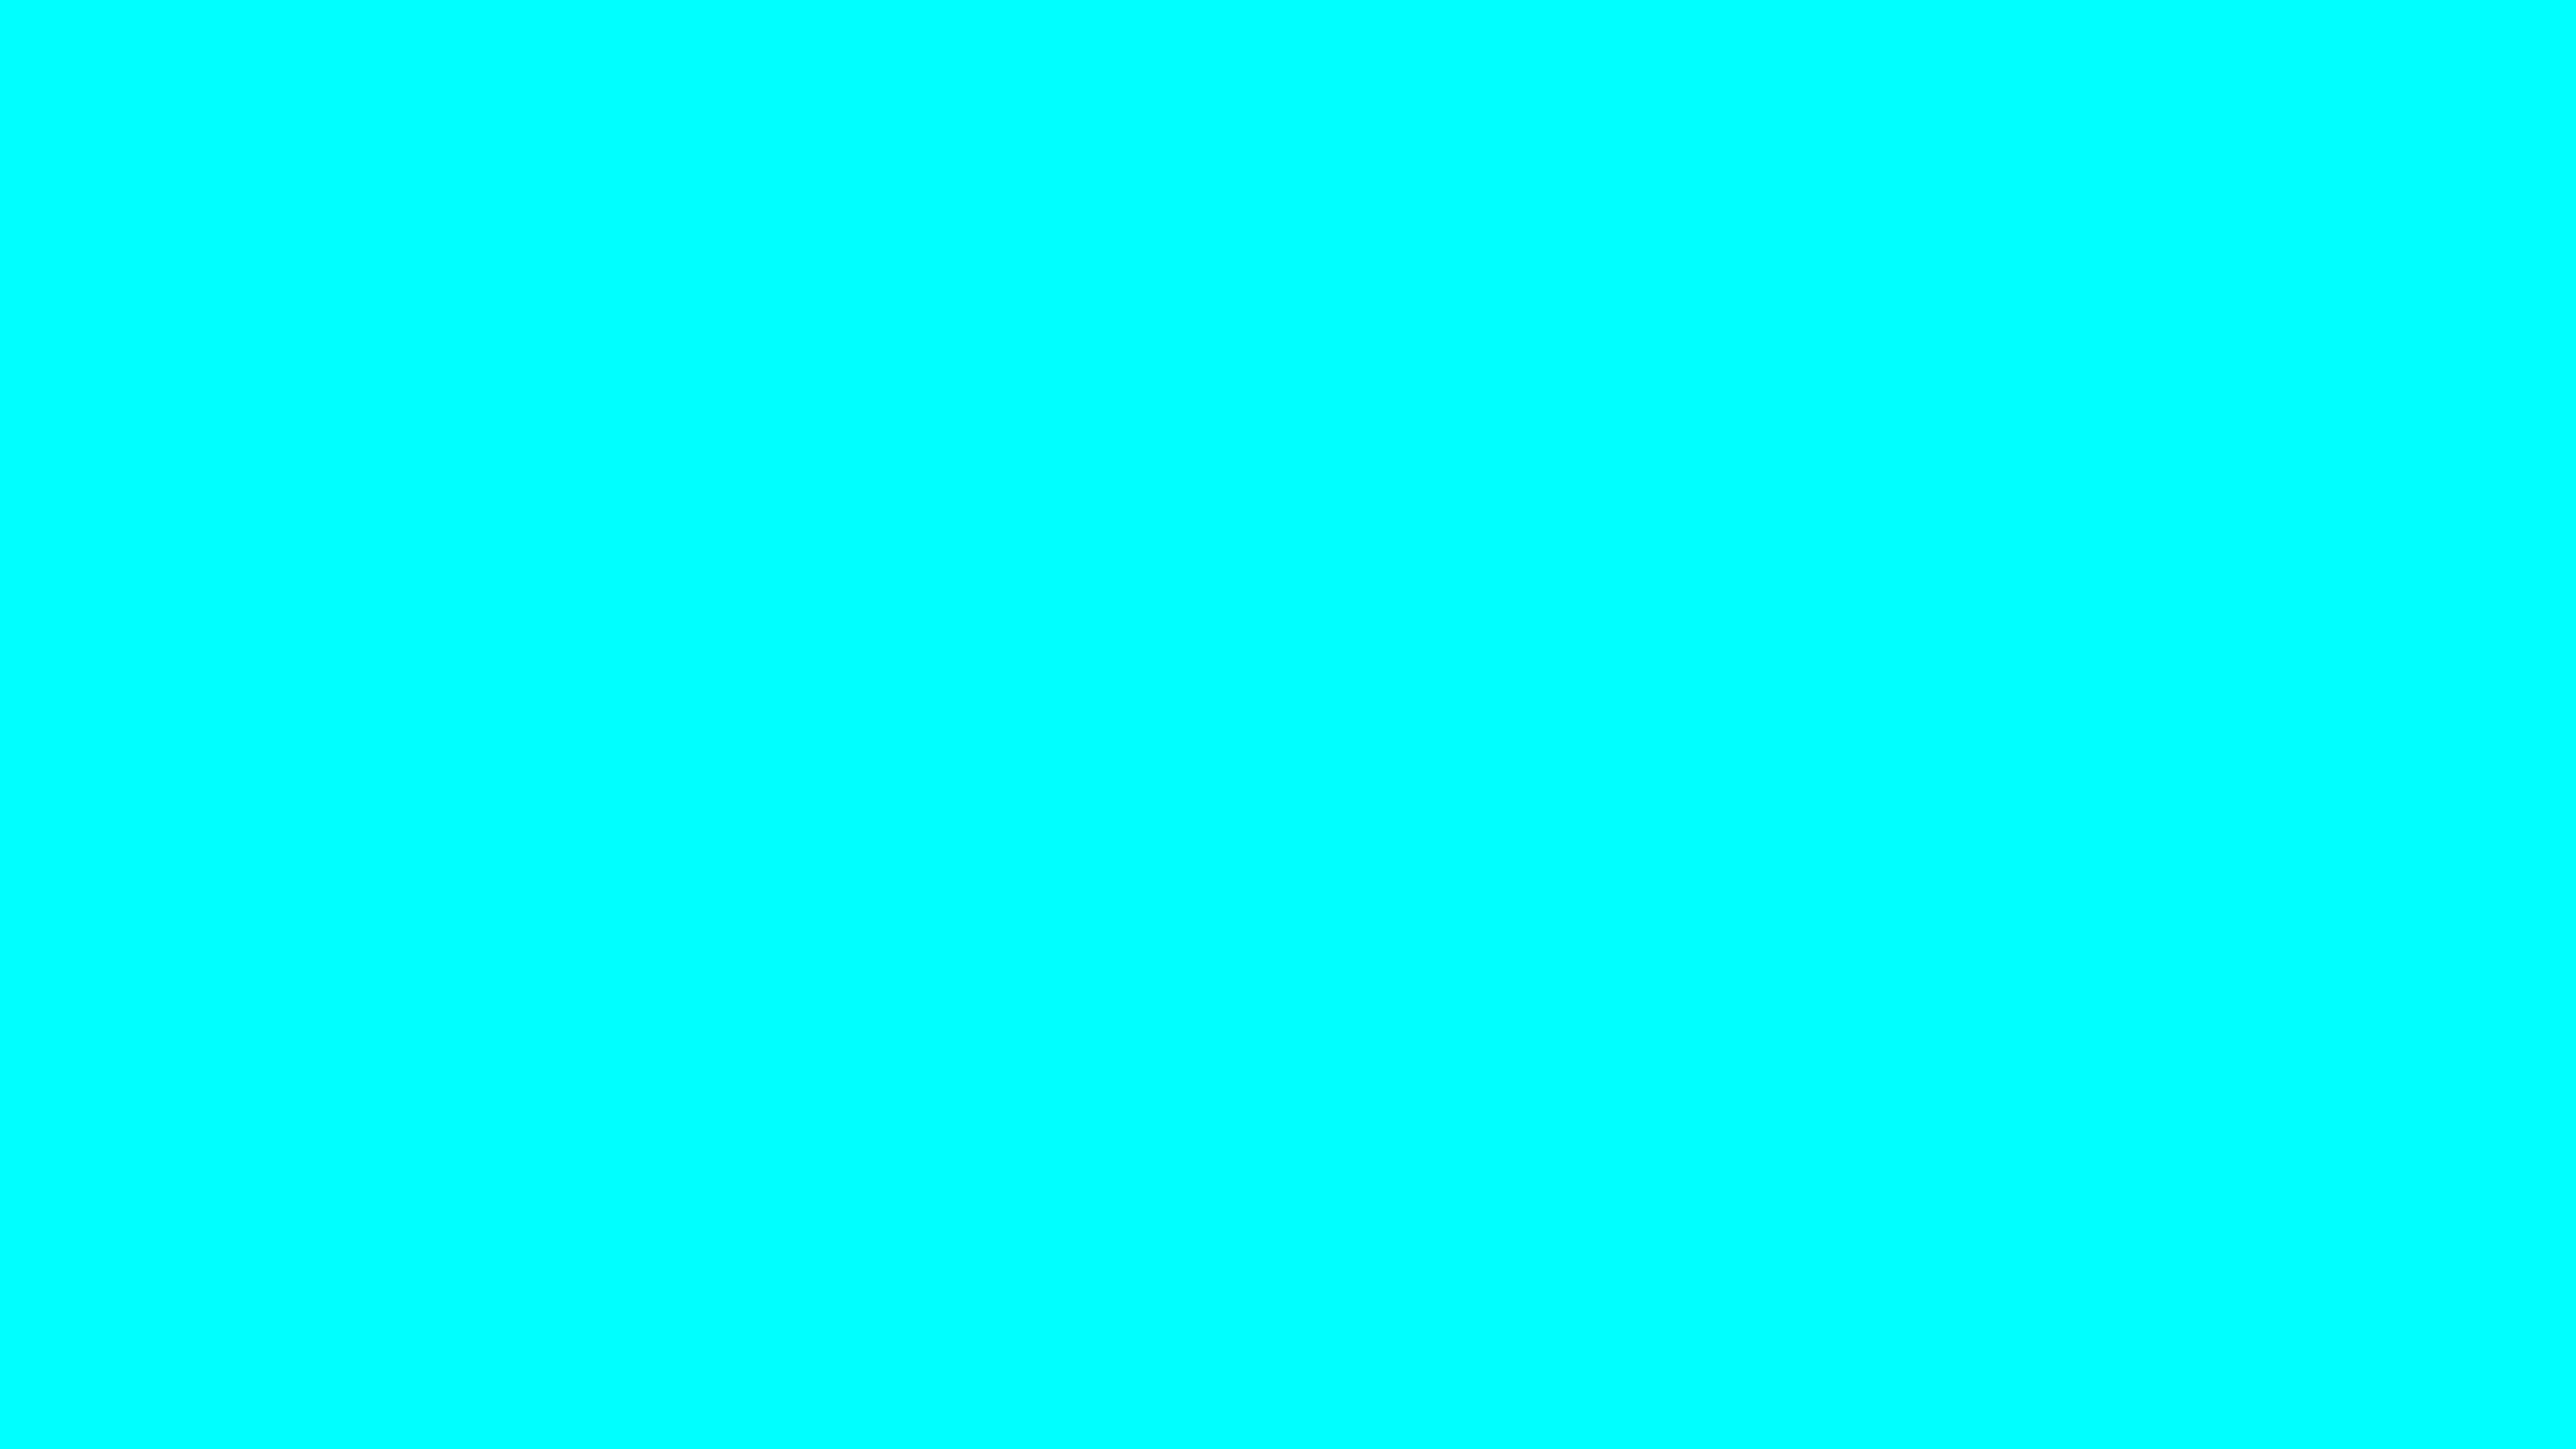

The dominant color is RGB: (0, 255, 255)
The closest color name is: cyan


In [16]:
image_path = "cyan.png"
output(image_path)

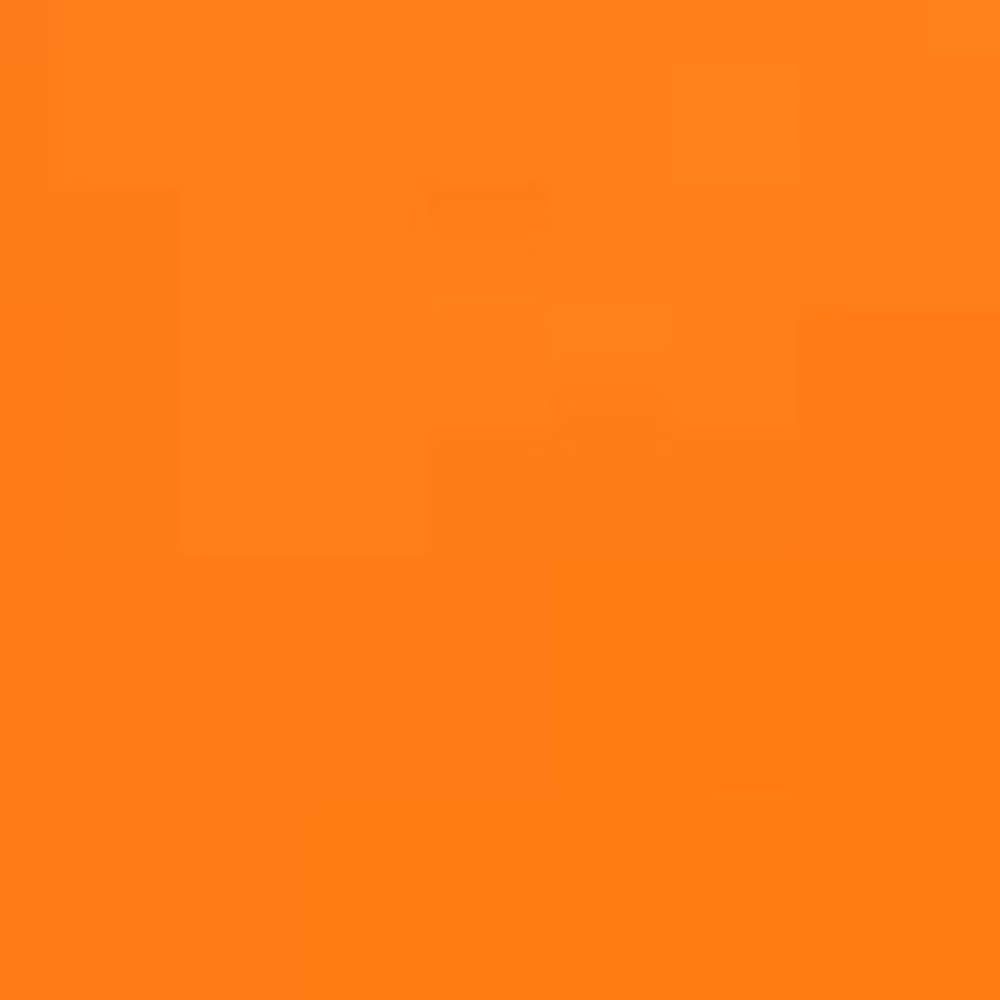

The dominant color is RGB: (253, 124, 23)
The closest color name is: darkorange


In [17]:
image_path = "orange.png"
output(image_path)

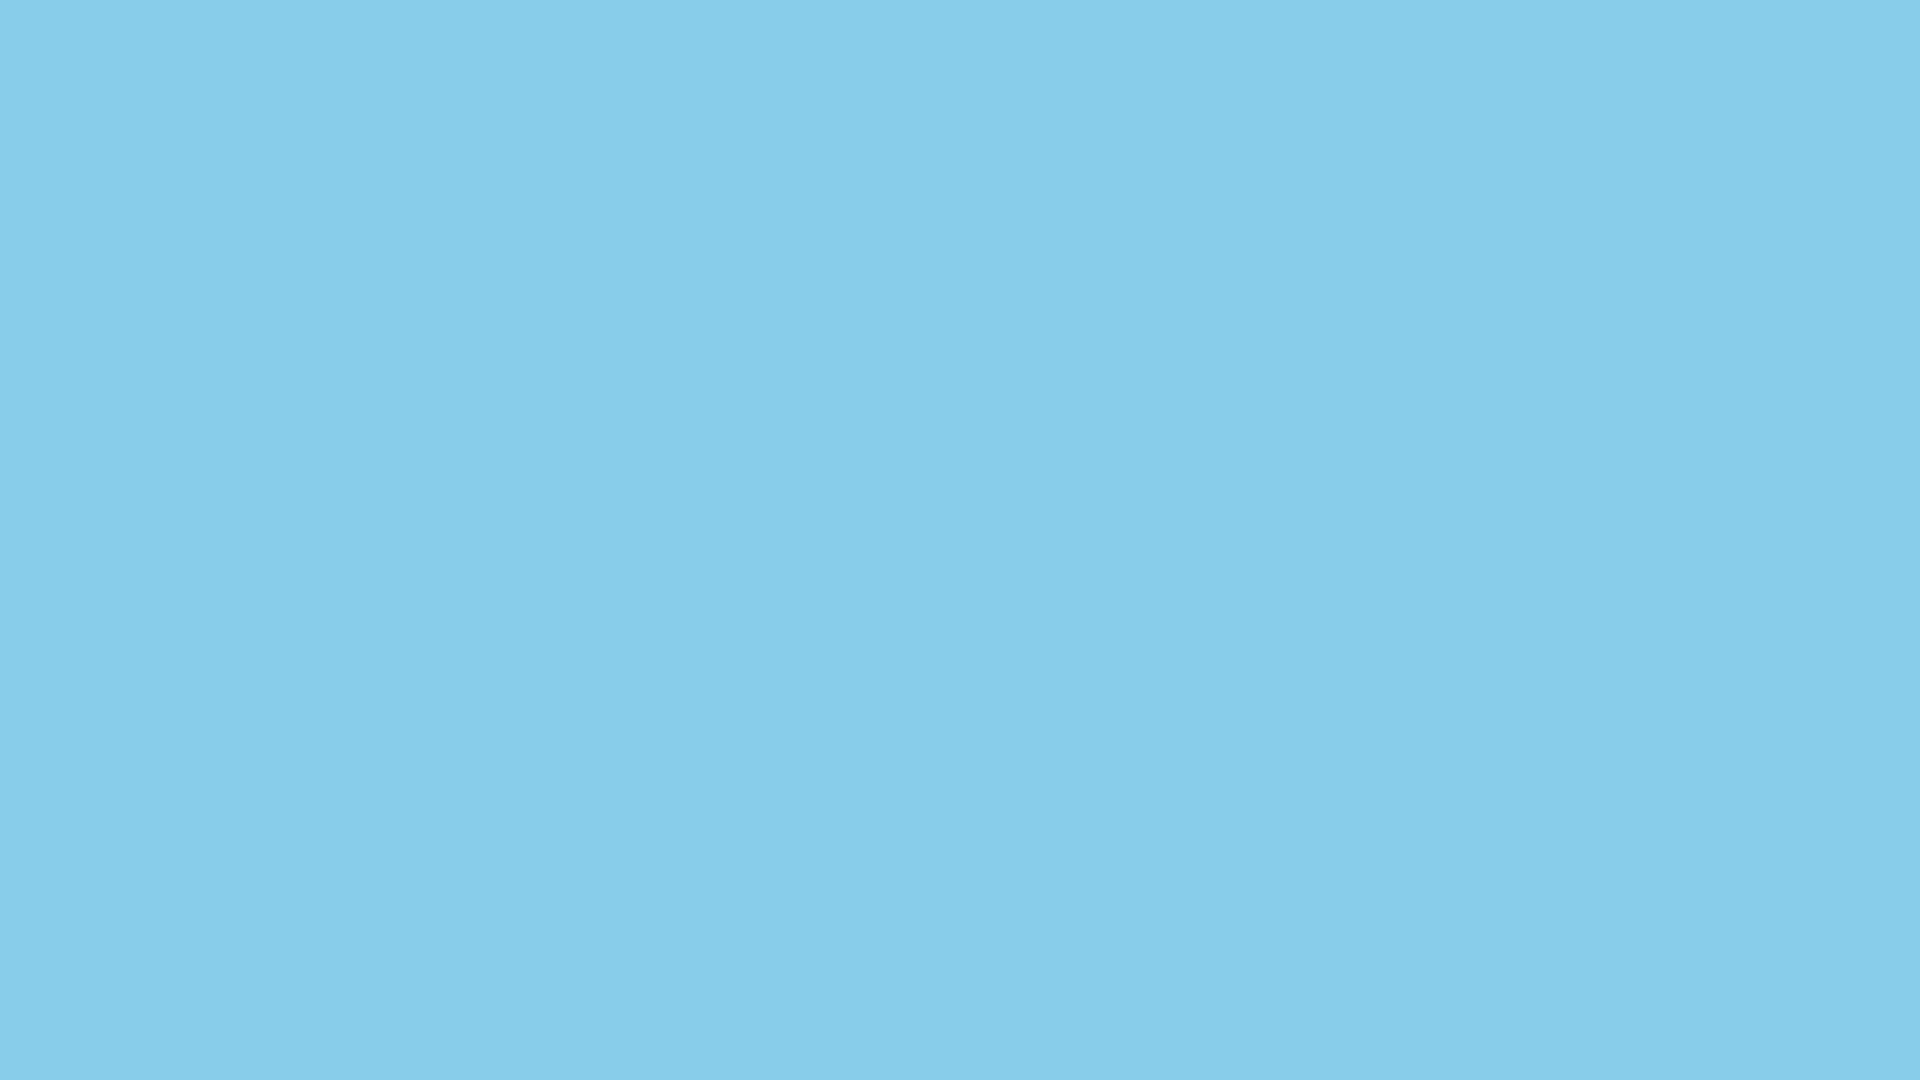

The dominant color is RGB: (135, 206, 235)
The closest color name is: skyblue


In [18]:
image_path = "sky.png"
output(image_path)

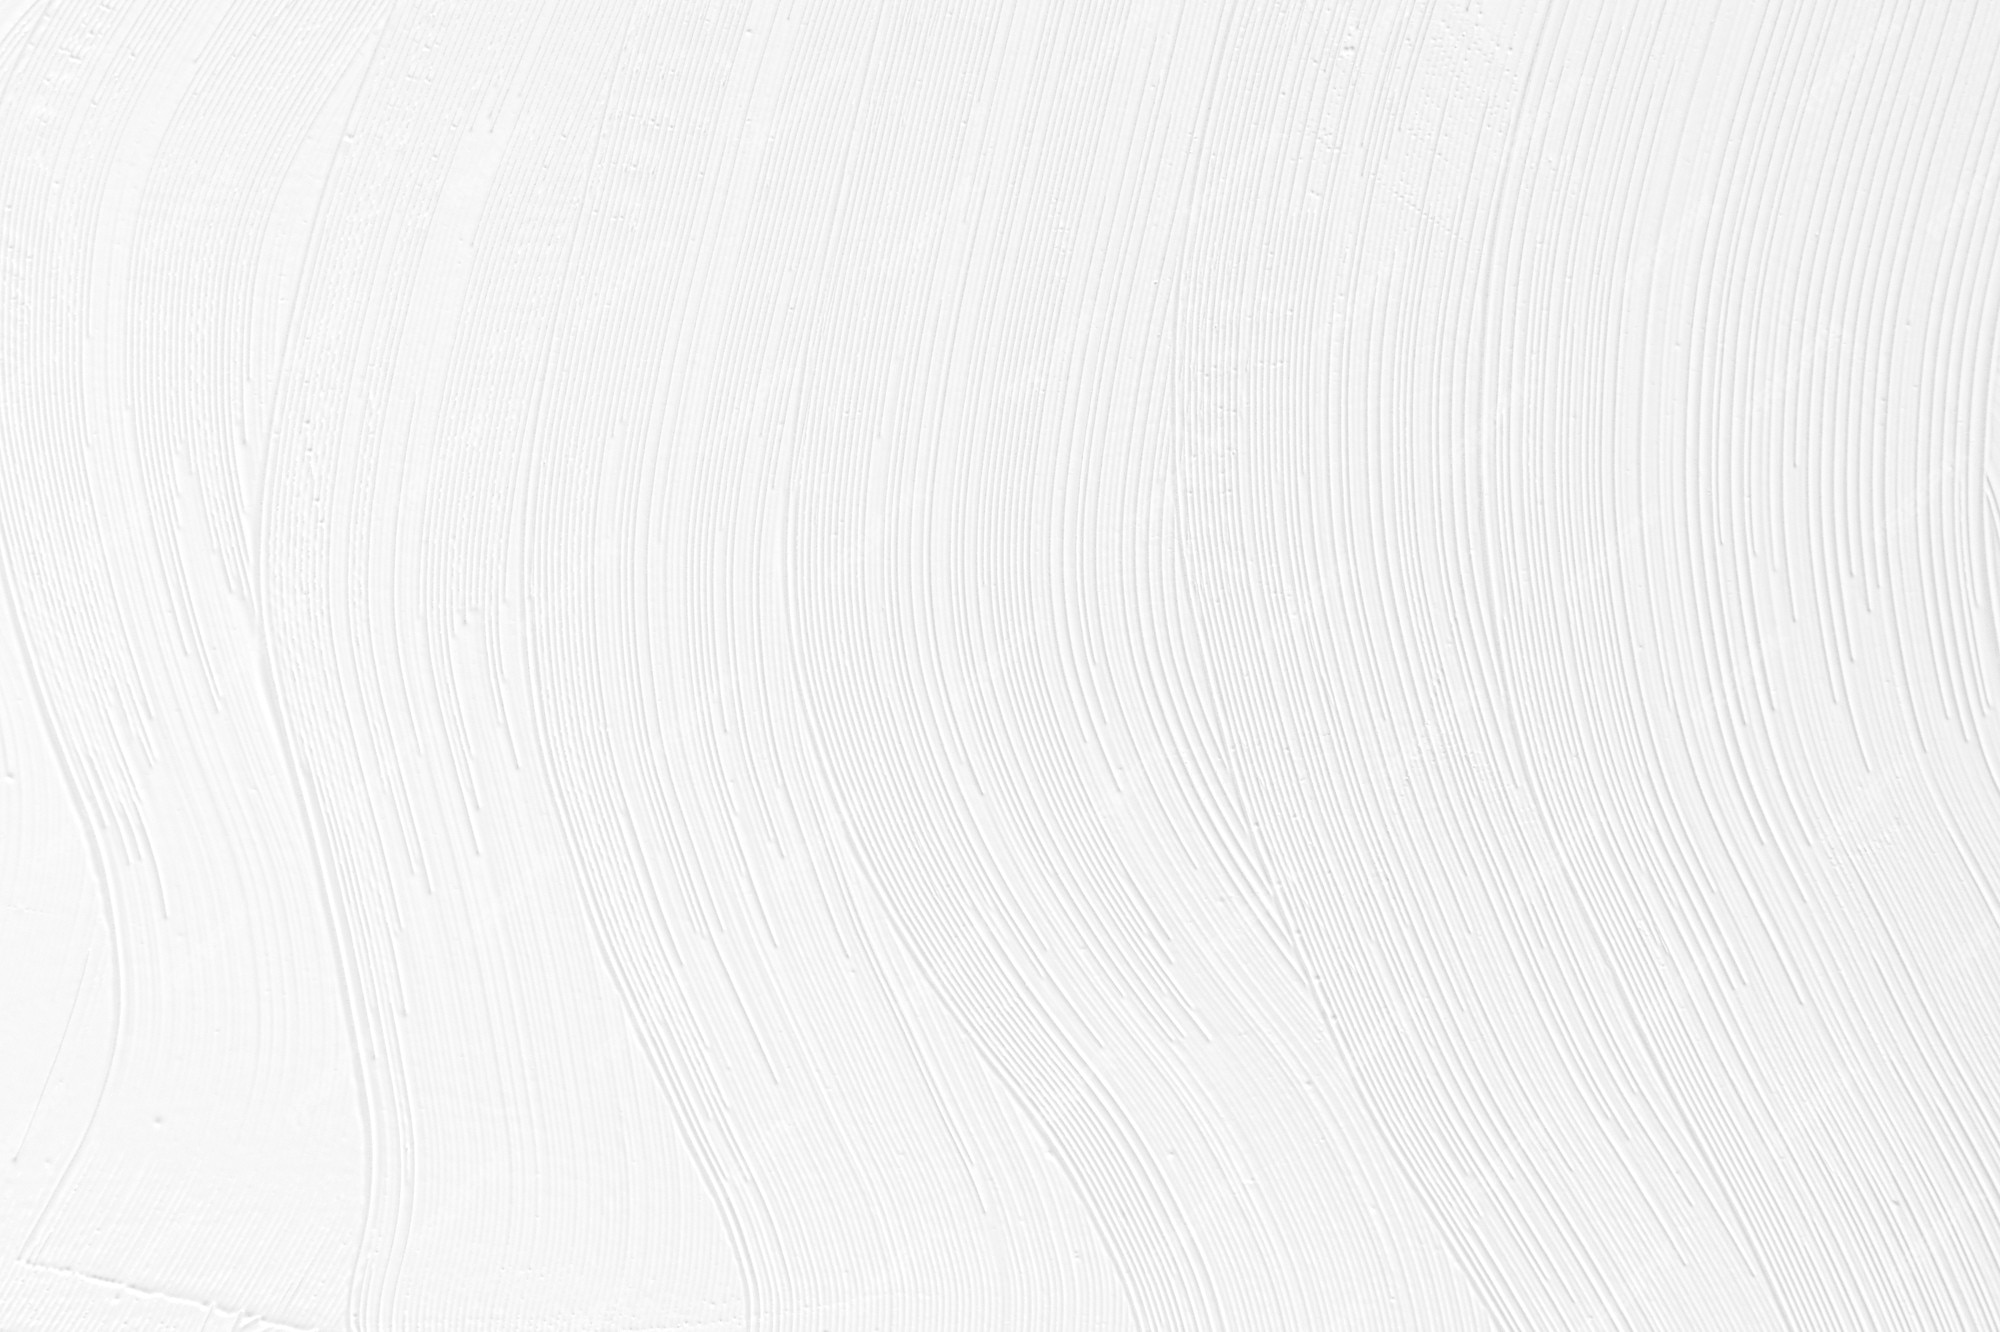

The dominant color is RGB: (237, 237, 237)
The closest color name is: whitesmoke


In [19]:
image_path = "gray.png"
output(image_path)